In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
AP = []
MN = []


In [67]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pickle

In [3]:
!pip install catboost

You should consider upgrading via the 'C:\python\python.exe -m pip install --upgrade pip' command.


In [4]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [10]:
pwd

'c:\\Users\\Chetan\\Downloads'

In [15]:
DF0 = pd.read_csv("C:\HTM2022\Crop_recommendation.csv")

In [16]:
DF0.head(n=11)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [17]:
NF = [a for a in DF0.columns if DF0[a].dtypes != 'O']
print("Numerical Features Count {}".format(len(NF)))

Numerical Features Count 7


In [18]:
print(NF)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [19]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [20]:
def RandomSamplingImputation(DF0, variable):
    DF0[variable]=DF0[variable]
    random_sample=DF0[variable].dropna().sample(DF0[variable].isnull().sum(),random_state=0)
    random_sample.index=DF0[DF0[variable].isnull()].index
    DF0.loc[DF0[variable].isnull(),variable]=random_sample

In [21]:
DF = [a for a in NF if len(DF0[a].unique())<25]
CF = [a for a in NF if a not in DF]

In [22]:
print(DF)

[]


In [ ]:
print(CF)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [23]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [24]:
for a in CF:
    if(DF0[a].isnull().sum()*100/len(DF0))>0:
        DF0[a] =DF0[a].fillna(DF0[a].median())

In [25]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [26]:
def Mode_Nan(DF0,variable):
    mode=DF0[variable].value_counts().index[0]
    DF0[variable].fillna(mode,inplace=True)

In [27]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [28]:
Cf = [a for a in DF0.columns if a not in NF]

In [29]:
print(Cf)

['label']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

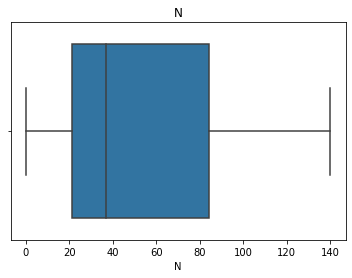

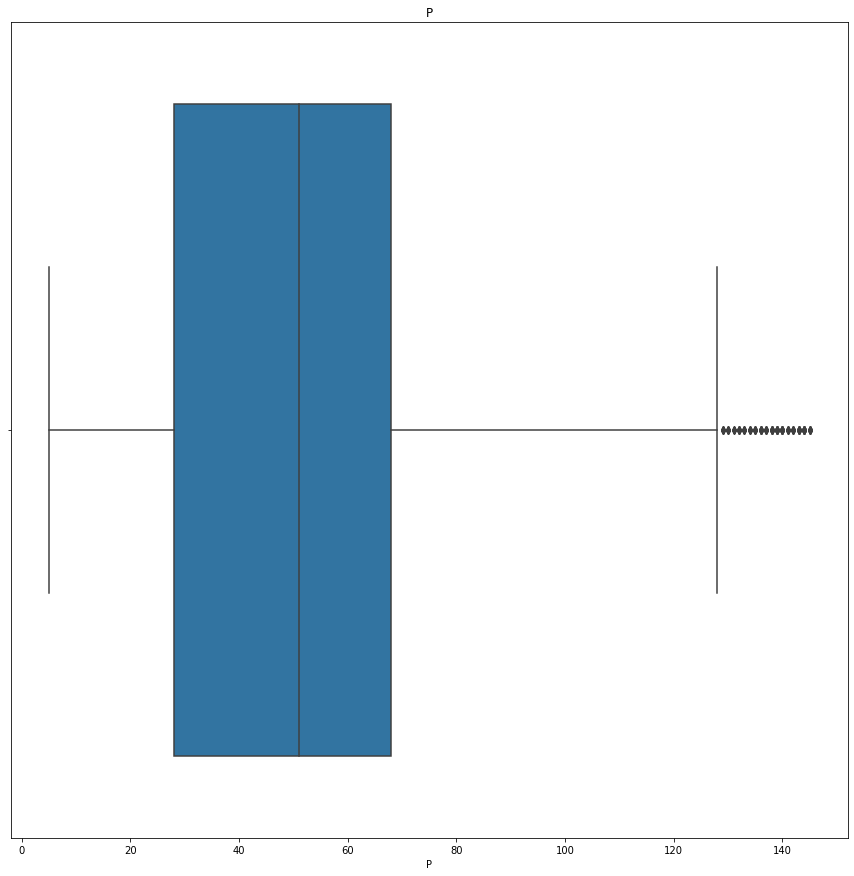

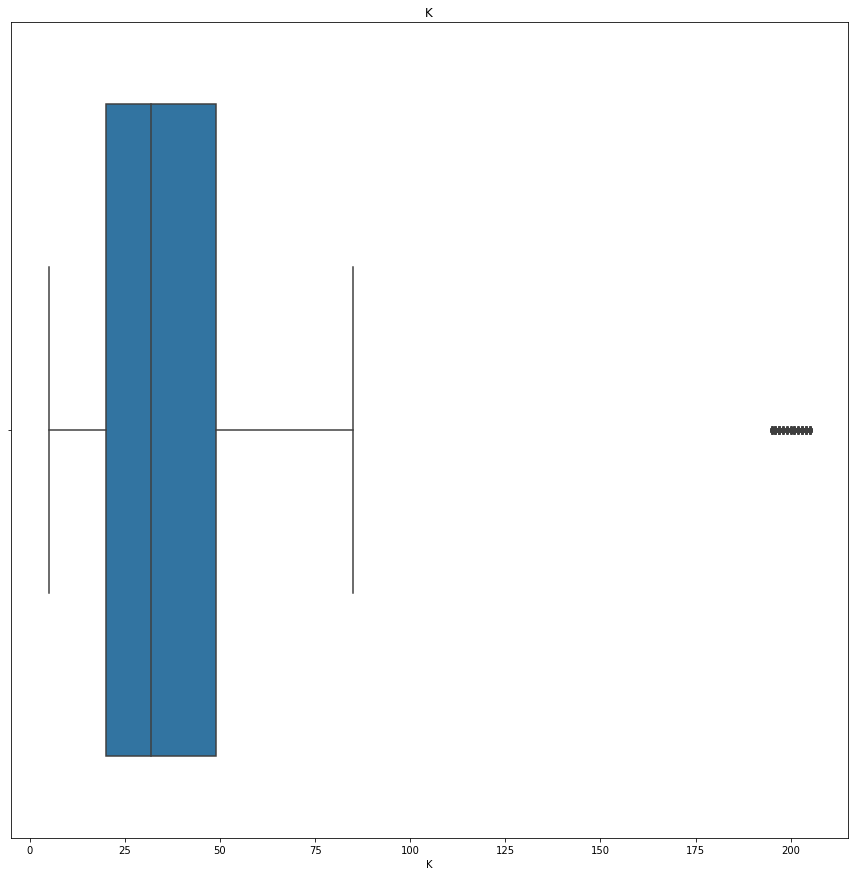

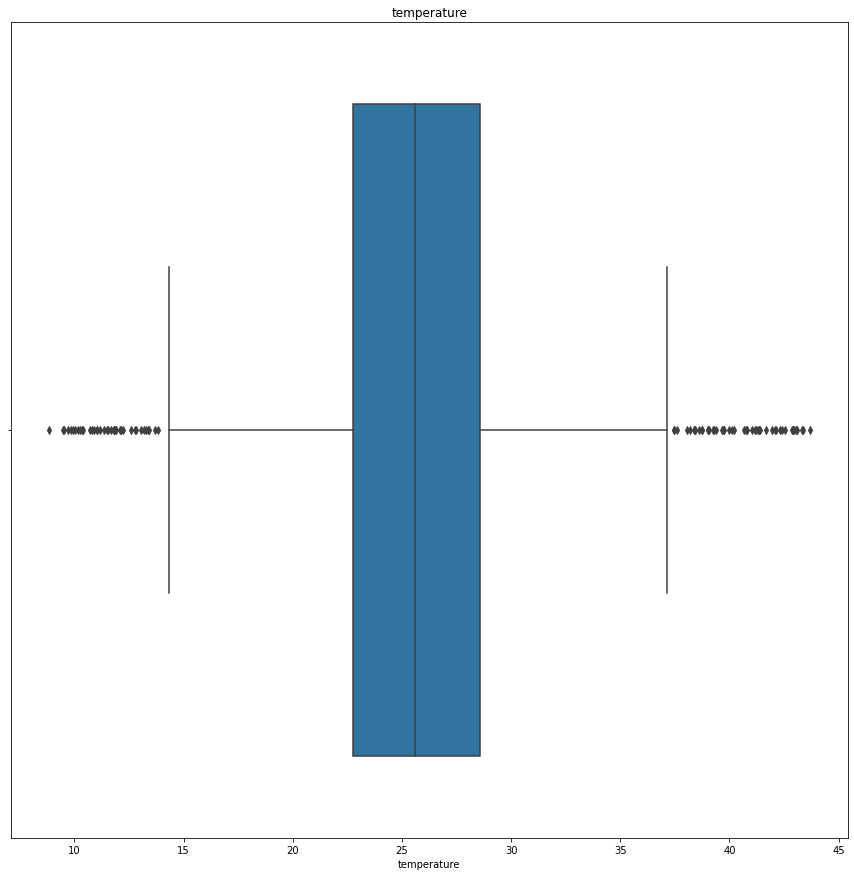

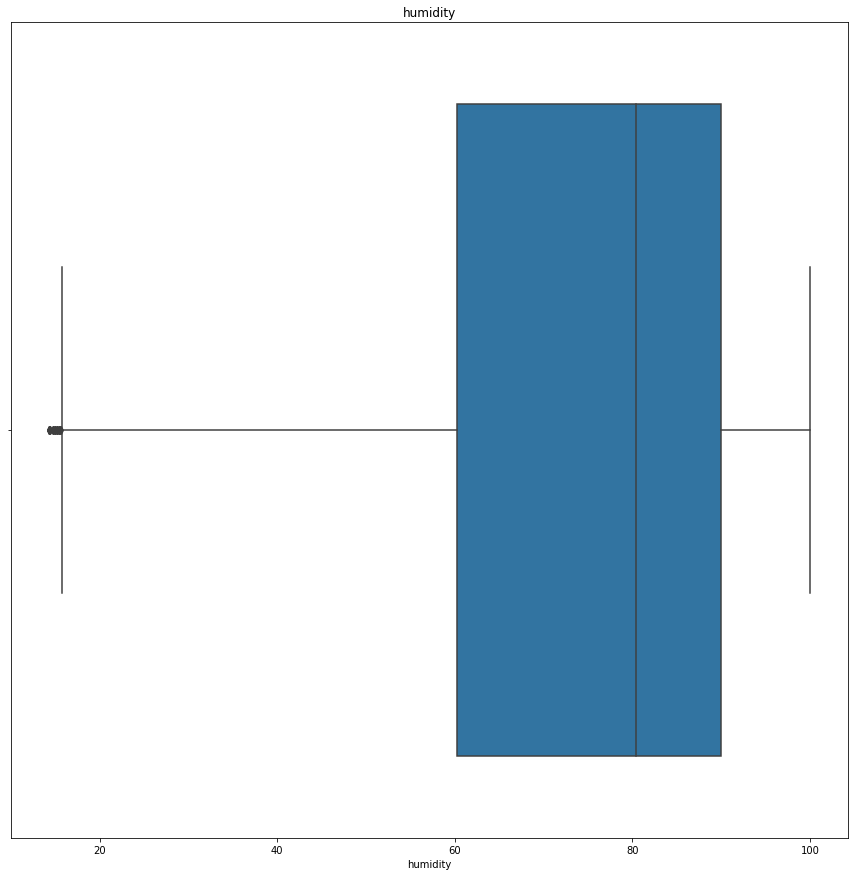

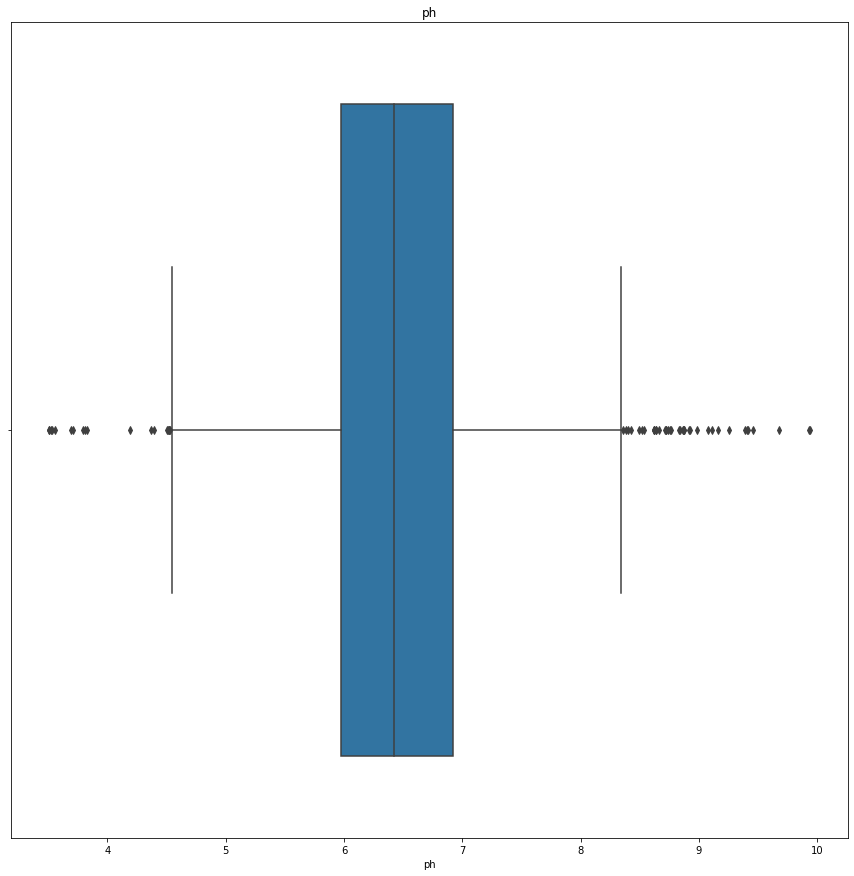

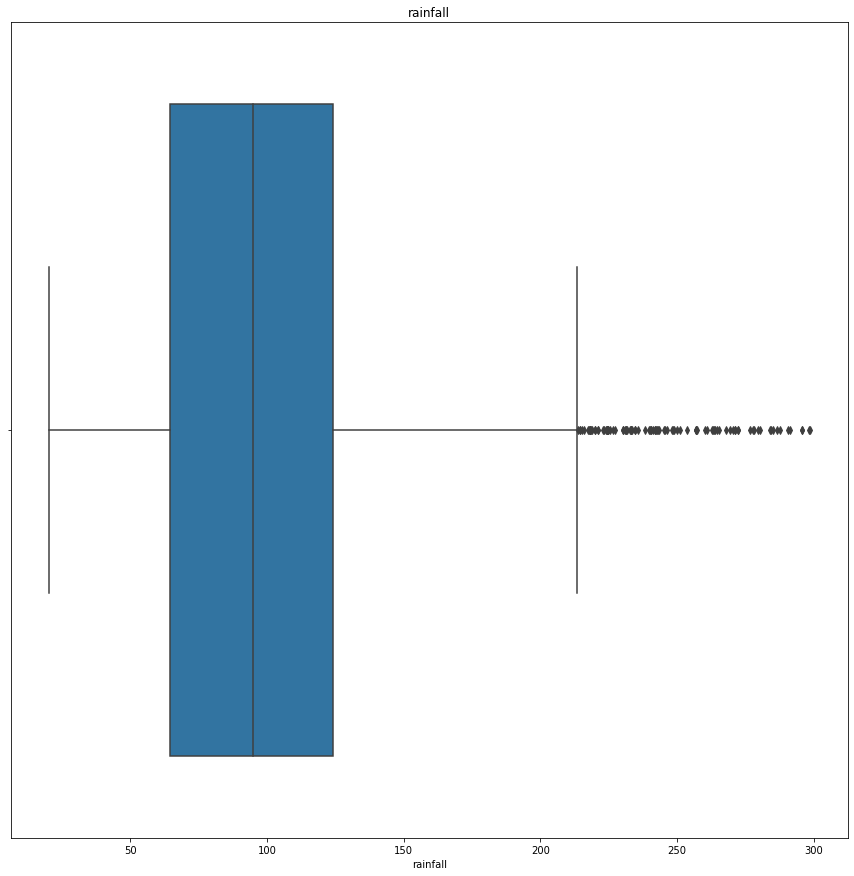

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for a in CF:
    data=DF0.copy()
    sns.boxplot(data[a])
    plt.title(a)
    plt.figure(figsize=(15,15))

In [30]:
DF0.tail(n=11)

,N,P,K,temperature,humidity,ph,rainfall,label
2189,99,16,30,23.526521,65.443409,6.392792,186.172820,coffee
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [31]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [32]:
DF0['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [33]:
DF0['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

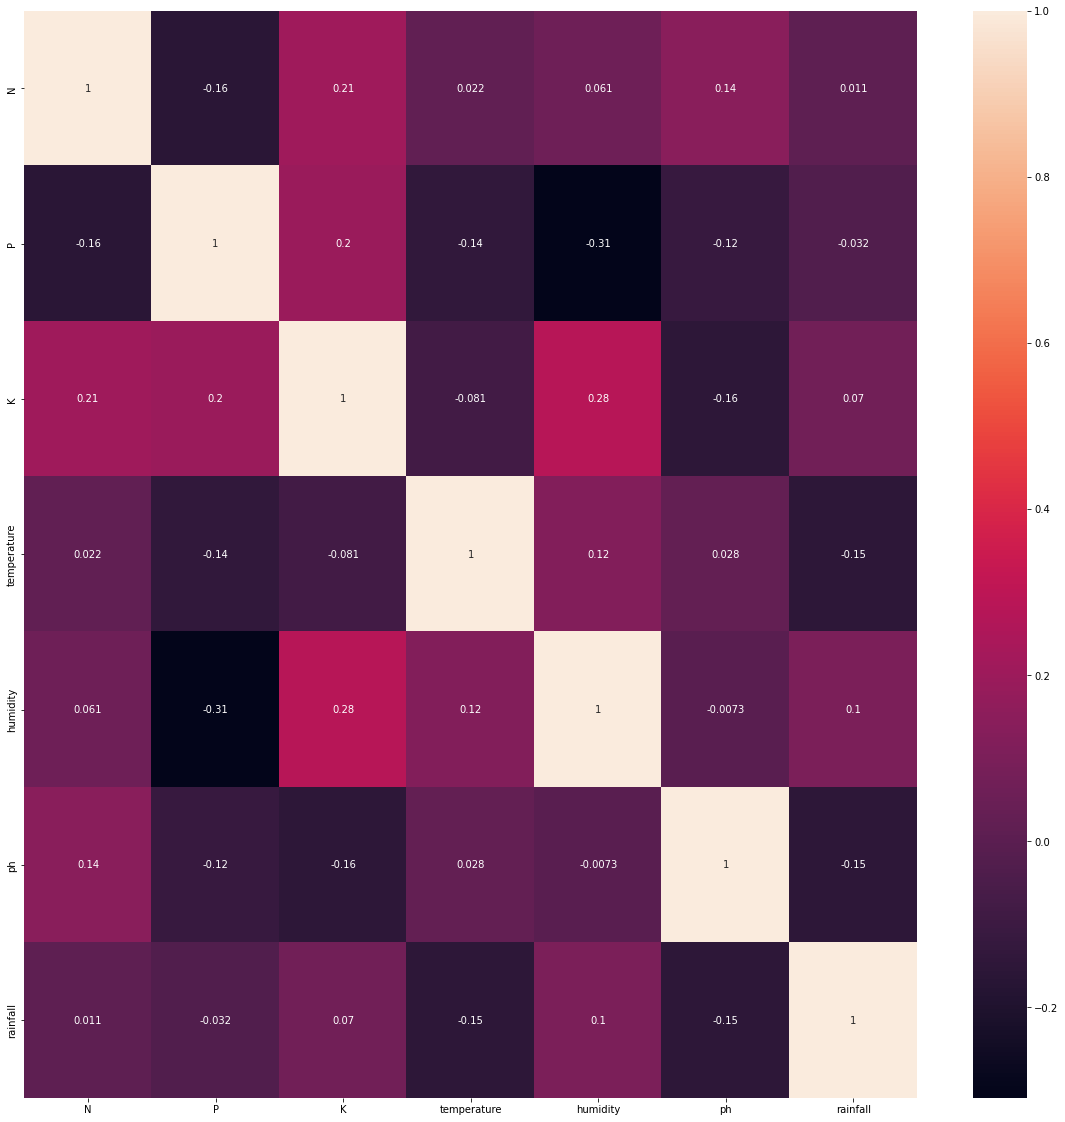

In [ ]:
corrmat = DF0.corr(method = "spearman")
plt.figure(figsize=(20,20))
b=sns.heatmap(corrmat,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


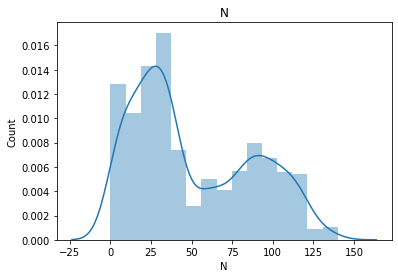

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


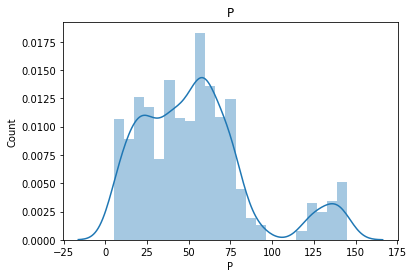

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


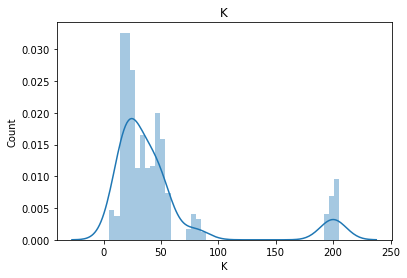

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


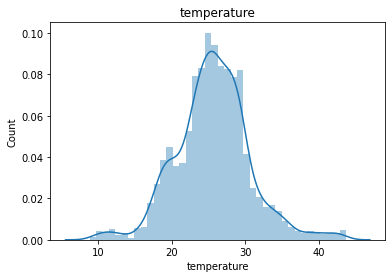

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


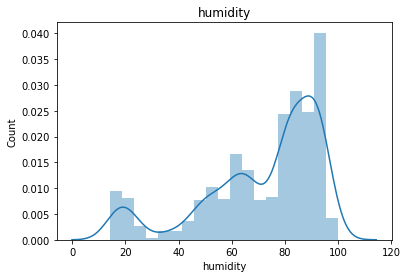

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


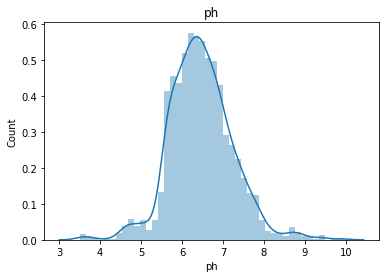

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


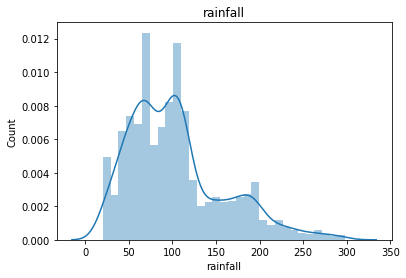

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for a in CF:
    data=DF0.copy()
    sns.distplot(DF0[a])
    plt.xlabel(a)
    plt.ylabel("Count")
    plt.title(a)
    plt.figure(figsize=(15,15))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

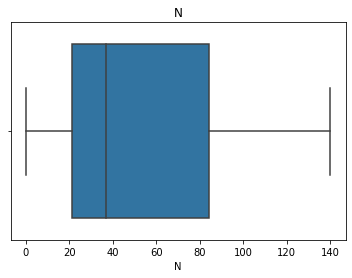

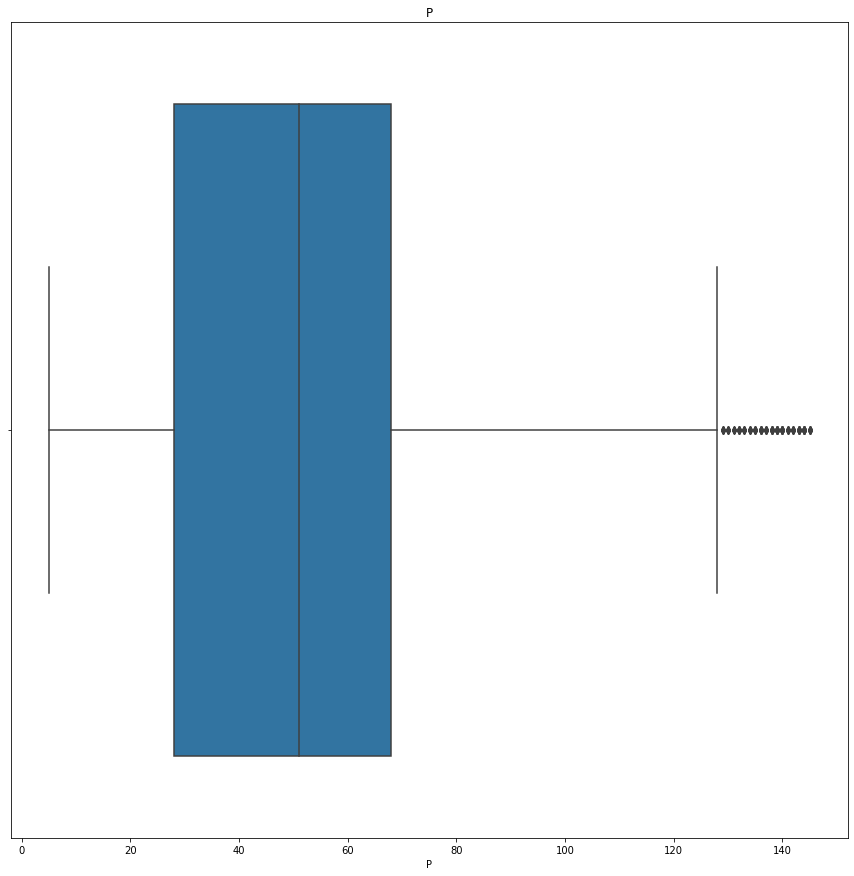

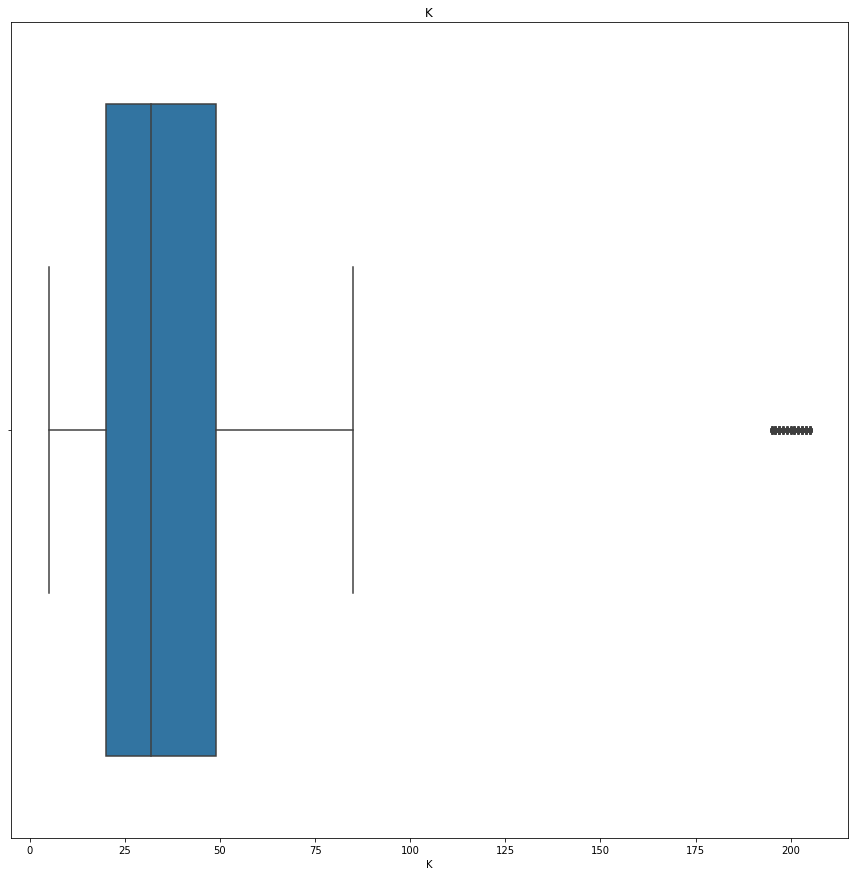

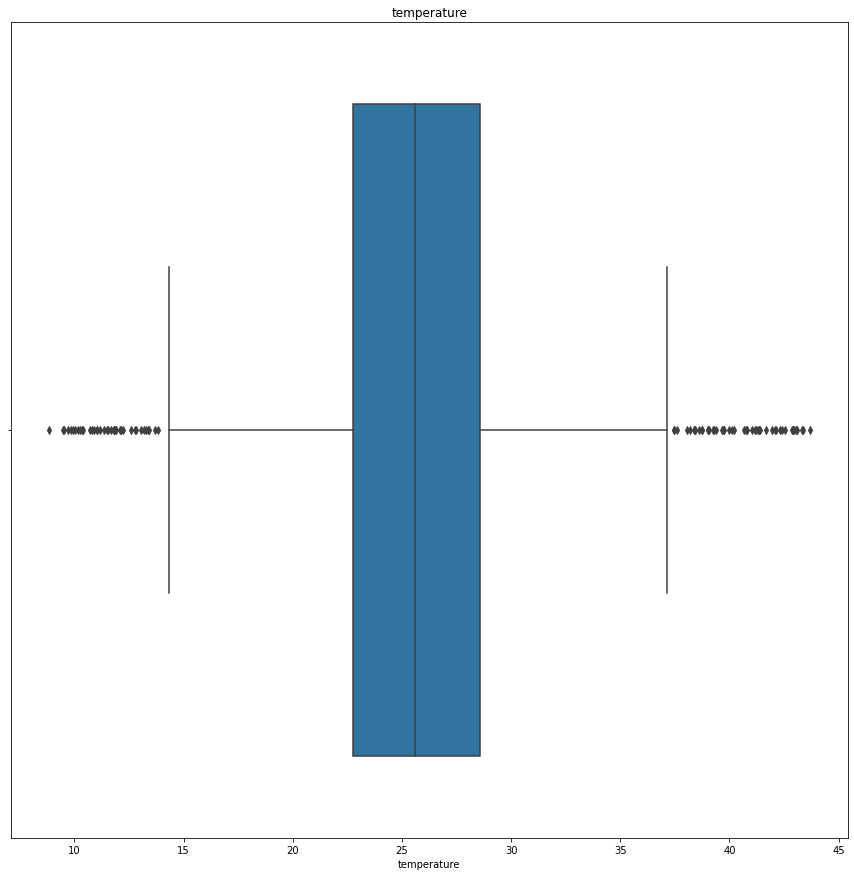

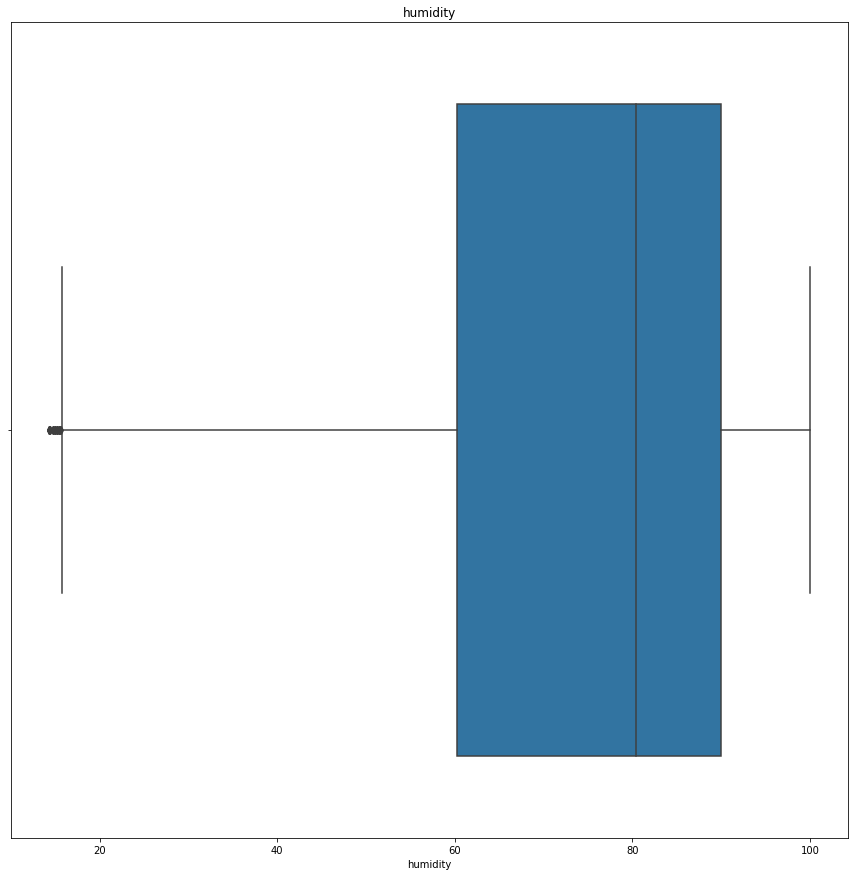

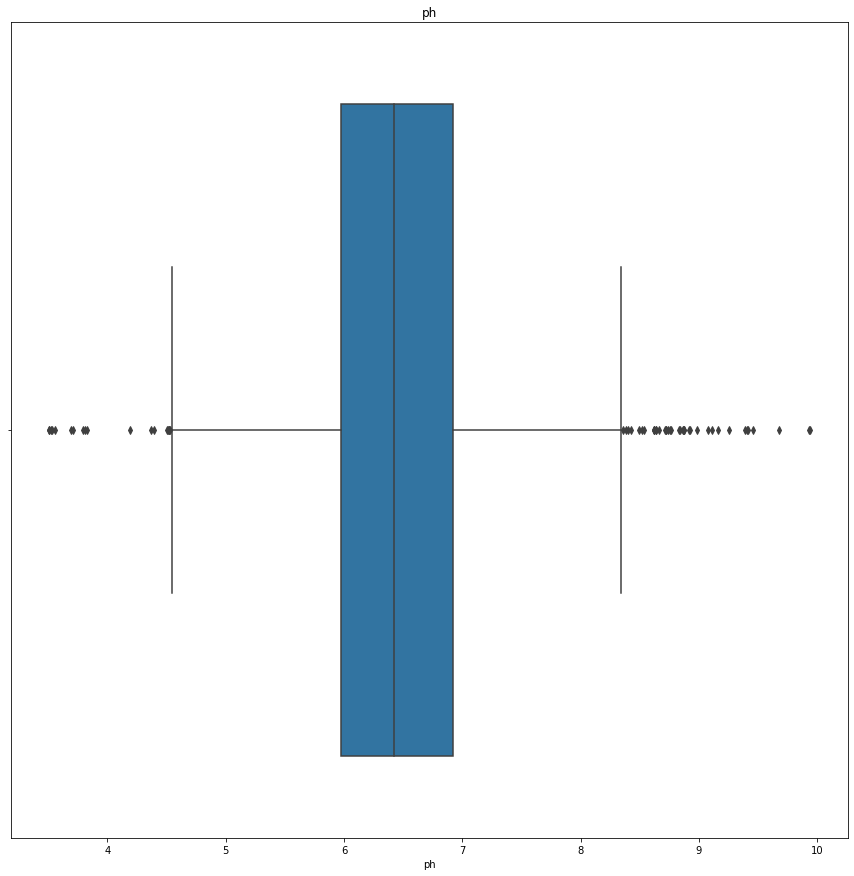

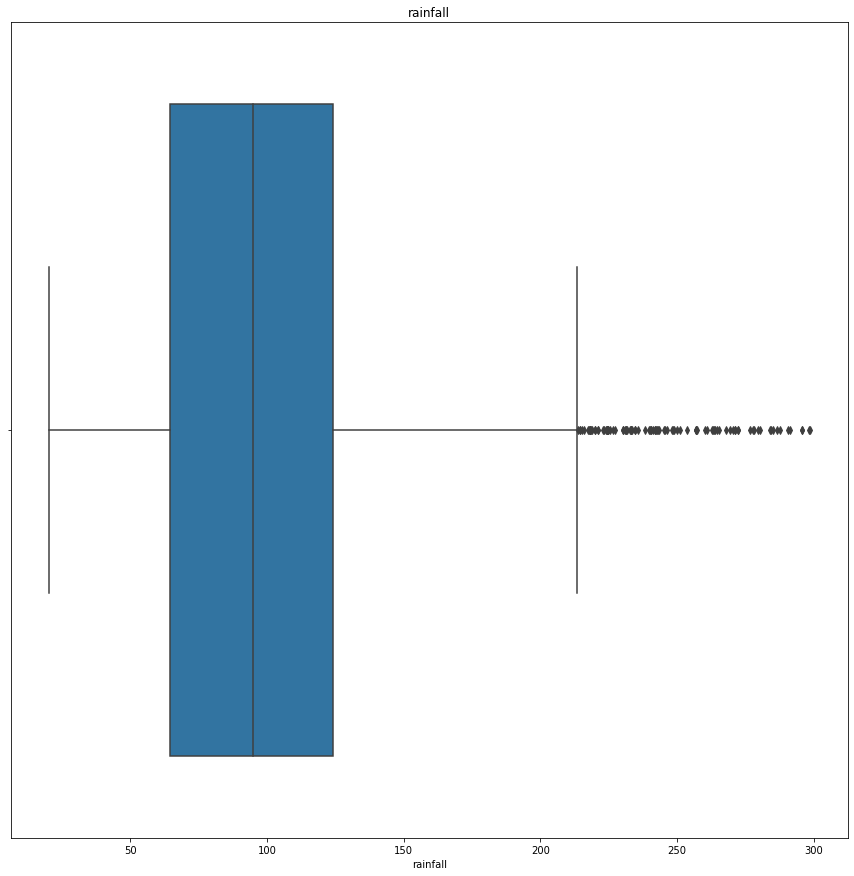

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for a in CF:
    data=DF0.copy()
    sns.boxplot(data[a])
    plt.title(a)
    plt.figure(figsize=(15,15))

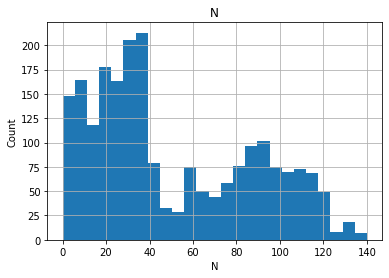

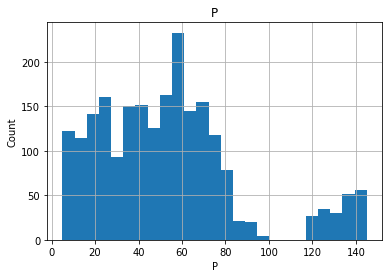

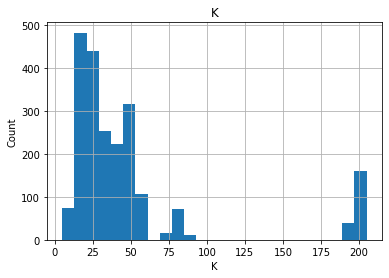

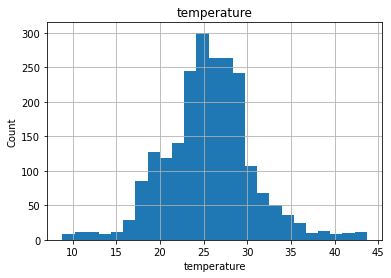

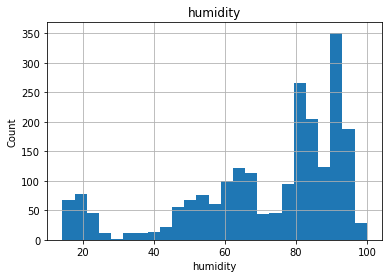

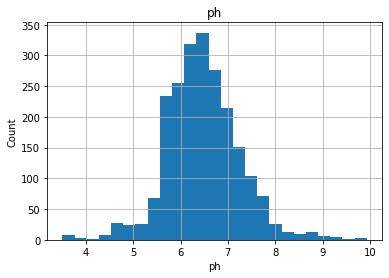

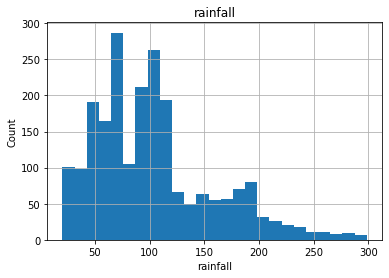

In [ ]:
for a in CF:
    data=DF0.copy()
    data[a].hist(bins=25)
    plt.xlabel(a)
    plt.ylabel("Count")
    plt.title(a)
    plt.show()

N


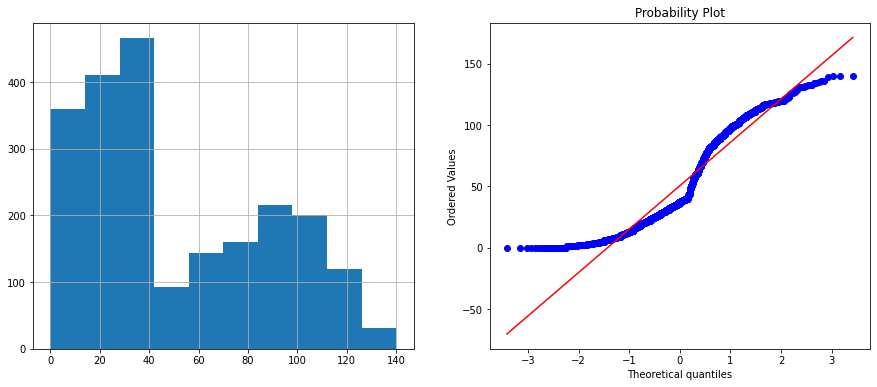

P


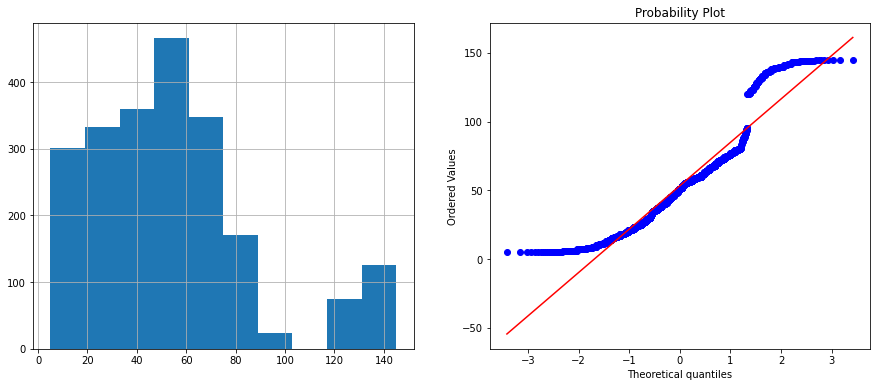

K


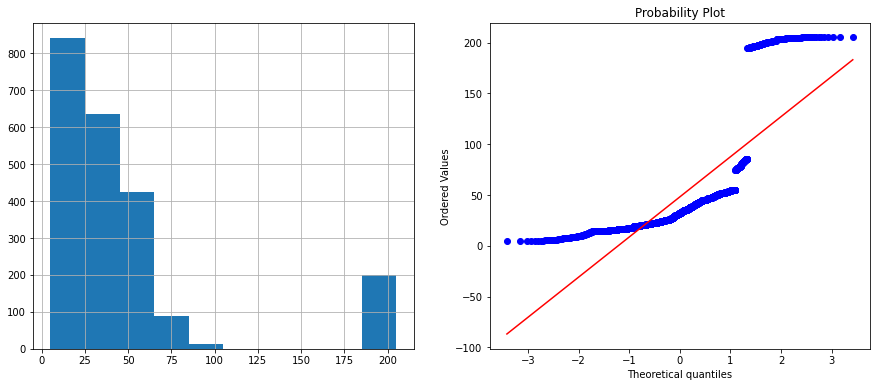

temperature


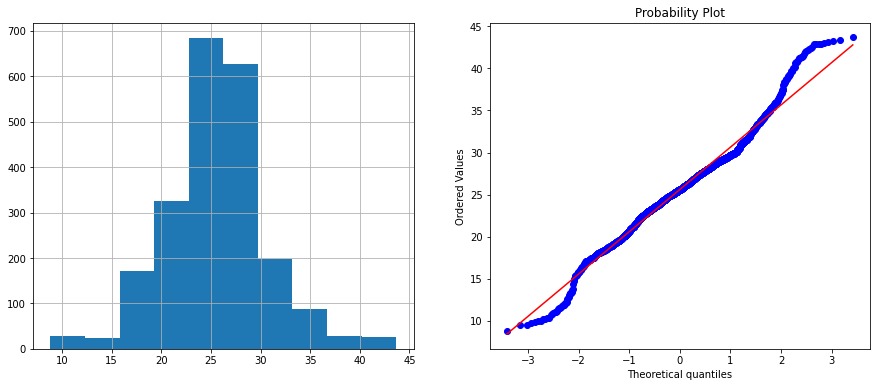

humidity


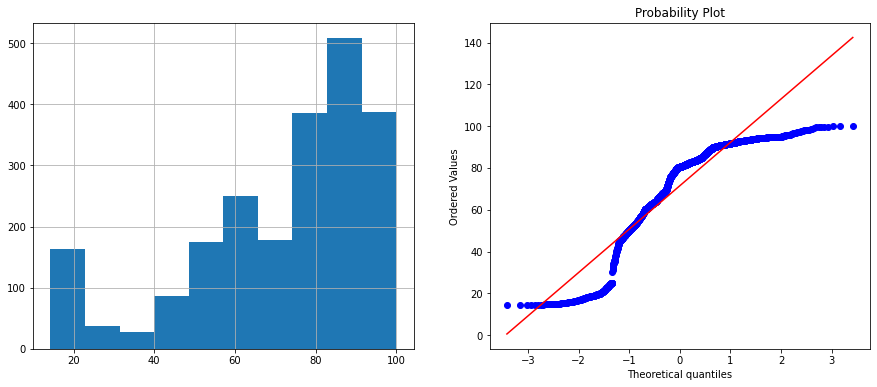

ph


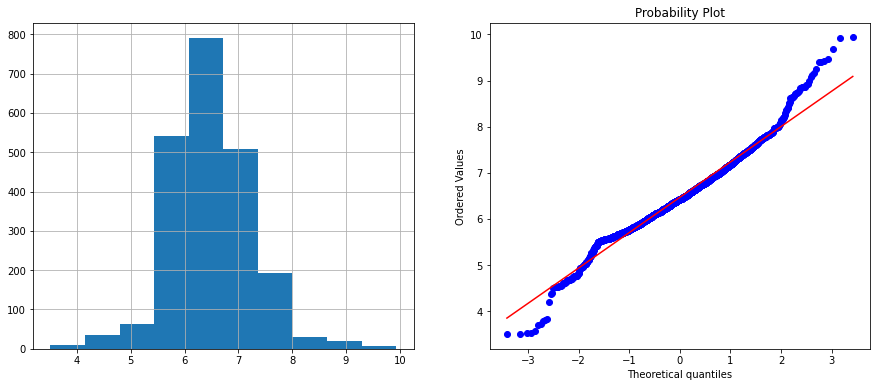

rainfall


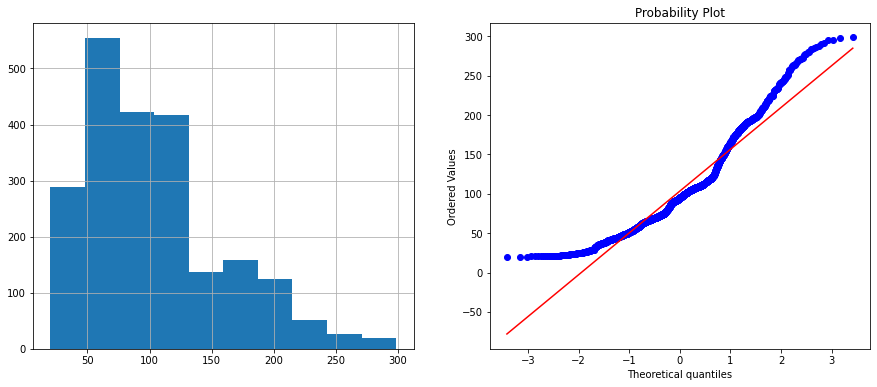

In [ ]:
for a in CF:
    print(a)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    DF0[a].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(DF0[a], dist="norm", plot=plt)
    plt.show()

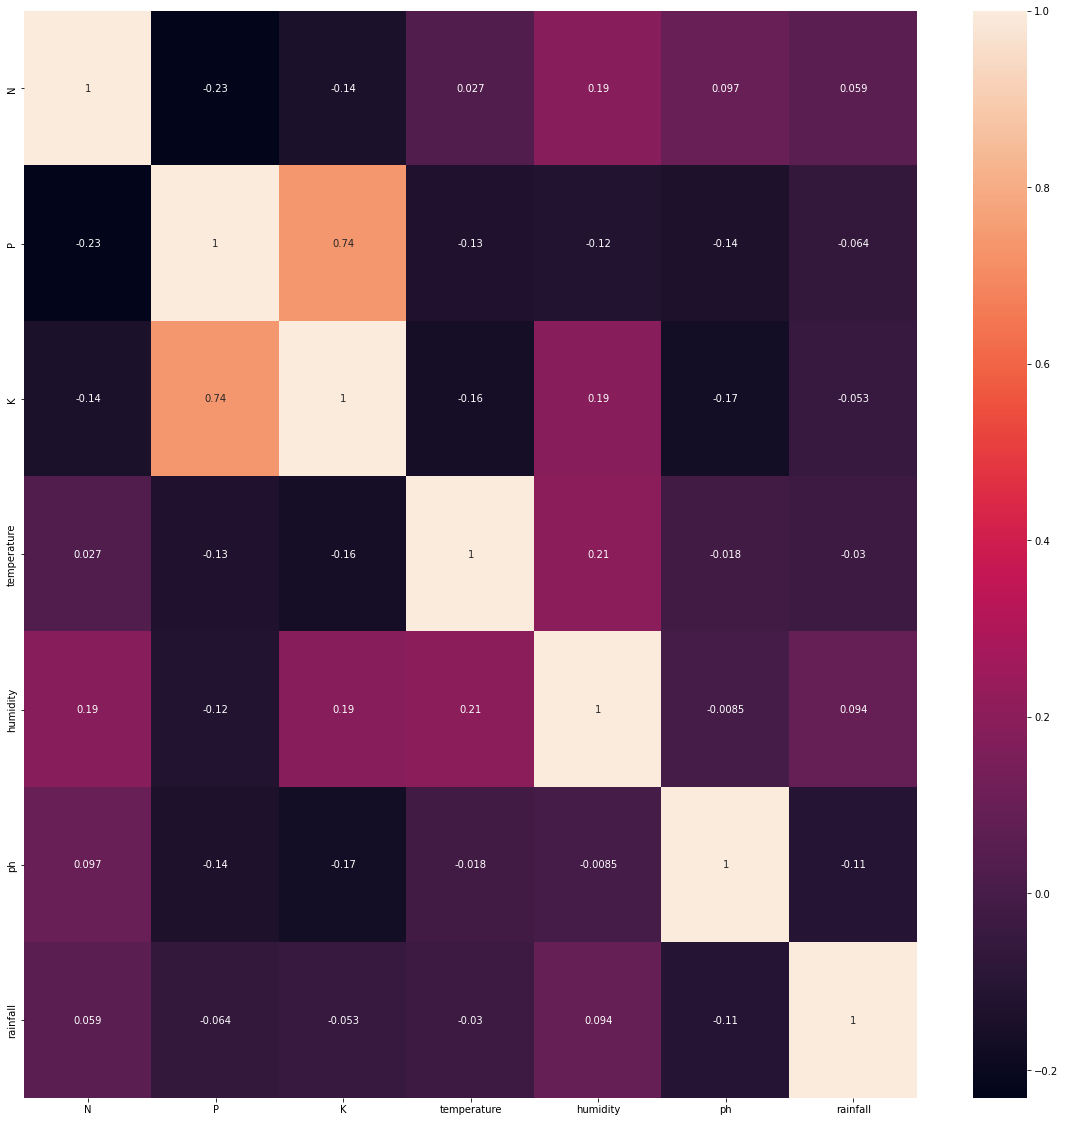

In [ ]:
corrmat = DF0.corr(method="pearson")
plt.figure(figsize=(20,20))
b=sns.heatmap(corrmat,annot=True)

In [ ]:
def qq_Plots(DF0, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    DF0[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(DF0[variable], dist="norm", plot=plt)
    plt.show()

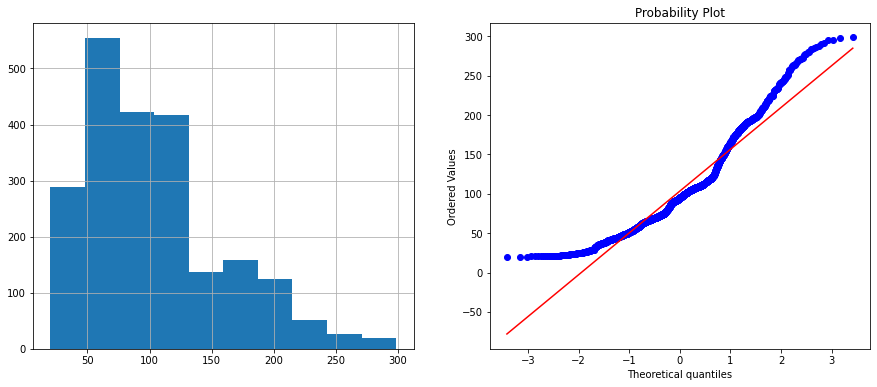

In [ ]:
qq_Plots(DF0,"rainfall")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


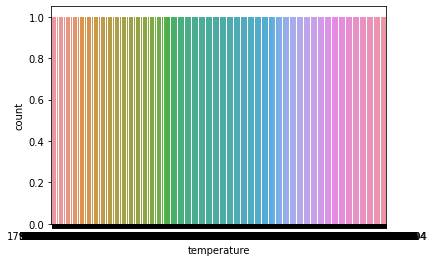

In [ ]:
sns.countplot(DF0["temperature"])

In [34]:
a = DF0[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
Target = DF0['label']
Labels = DF0['label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(a, Target, test_size =0.2, random_state = 2)

In [36]:
print(len(X_train))

1760


In [ ]:
print(len(X_test))

440


In [ ]:
print(len(y_train))

1760


In [ ]:
print(len(y_test))

440


In [ ]:
print(X_train)

        N    P    K  temperature   humidity        ph    rainfall
1936  113   38   25    22.000851  79.472710  7.388266   90.422242
610    28   35   22    29.530376  86.733460  7.156563   59.872321
372    11   61   21    18.623288  23.024103  5.532101  135.337803
1559   29  139  205    23.641424  93.744615  6.155939  116.691218
1500   24  128  196    22.750888  90.694892  5.521467  110.431786
...   ...  ...  ...          ...        ...       ...         ...
1071  105   88   54    25.787498  84.511942  6.020445  114.200546
433    27   71   23    23.453790  46.487148  7.109598  150.871220
674    23   39   22    29.256493  81.979522  6.864839   42.024833
1099  117   81   53    29.507046  78.205856  5.507642   98.125658
1608   39   24   14    30.554726  90.903438  7.189260  106.071198

[1760 rows x 7 columns]


In [ ]:
print(X_test)

        N   P   K  temperature   humidity        ph    rainfall
2121   83  21  28    25.567483  60.492446  7.466901  190.225784
960     1  27  36    23.985988  93.342366  5.684995  104.991282
952    23   5  44    21.207254  94.263047  7.163005  107.566080
1958  116  52  19    22.942767  75.371706  6.114526   67.080226
681     6  37  17    28.086572  80.350059  6.760694   38.144768
...   ...  ..  ..          ...        ...       ...         ...
1684    7  17  10    10.164313  91.223210  6.465913  106.362551
1477   86  18  45    28.965866  90.718329  6.566759   22.258381
851     6  64  23    23.335652  67.404607  7.065264   36.186787
370    37  56  25    22.055923  19.603793  5.774755  126.726537
2010   89  53  44    24.886928  71.917115  7.319735  150.249867

[440 rows x 7 columns]


In [ ]:
print(y_train)

1936         cotton
610        mungbean
372     kidneybeans
1559          apple
1500          apple
           ...     
1071         banana
433      pigeonpeas
674        mungbean
1099         banana
1608         orange
Name: label, Length: 1760, dtype: object


In [ ]:
print(y_test)

2121         coffee
960     pomegranate
952     pomegranate
1958         cotton
681        mungbean
           ...     
1684         orange
1477      muskmelon
851          lentil
370     kidneybeans
2010           jute
Name: label, Length: 440, dtype: object


In [37]:
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)

SVC(gamma='auto')

In [38]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [39]:
LR = LogisticRegression(random_state=2)
LR.fit(X_train,y_train)

C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [40]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
CB = CatBoostClassifier(iterations=3000, eval_metric = "AUC")
CB.fit(X_train, y_train)

Learning rate set to 0.032187
0:	total: 178ms	remaining: 8m 53s
1:	total: 201ms	remaining: 5m 1s
2:	total: 235ms	remaining: 3m 54s
3:	total: 269ms	remaining: 3m 21s
4:	total: 302ms	remaining: 3m
5:	total: 324ms	remaining: 2m 41s
6:	total: 345ms	remaining: 2m 27s
7:	total: 368ms	remaining: 2m 17s
8:	total: 388ms	remaining: 2m 8s
9:	total: 409ms	remaining: 2m 2s
10:	total: 432ms	remaining: 1m 57s
11:	total: 467ms	remaining: 1m 56s
12:	total: 504ms	remaining: 1m 55s
13:	total: 527ms	remaining: 1m 52s
14:	total: 549ms	remaining: 1m 49s
15:	total: 570ms	remaining: 1m 46s
16:	total: 592ms	remaining: 1m 43s
17:	total: 614ms	remaining: 1m 41s
18:	total: 636ms	remaining: 1m 39s
19:	total: 666ms	remaining: 1m 39s
20:	total: 696ms	remaining: 1m 38s
21:	total: 717ms	remaining: 1m 37s
22:	total: 738ms	remaining: 1m 35s
23:	total: 761ms	remaining: 1m 34s
24:	total: 783ms	remaining: 1m 33s
25:	total: 804ms	remaining: 1m 31s
26:	total: 825ms	remaining: 1m 30s
27:	total: 847ms	remaining: 1m 29s
28:	tot

In [42]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [43]:
#XGB_C = xgb.XGBClassifier()
#XGB_C.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21], got ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']

In [68]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

pickle.dump(RF, open("model.pkl","wb"))

In [45]:
PRED0 = SVM.predict(X_test)
x = metrics.accuracy_score(y_test,PRED0)
AP.append(x)
MN.append('SVM')
print("SVM Accuracy ==>: ", x)
print(classification_report(y_test,PRED0))

SVM Accuracy ==>:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.0

C:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
PRED1 = DT.predict(X_test)
x = metrics.accuracy_score(y_test,PRED1)
AP.append(x)
MN.append('DT')
print("DT Accuracy ==>", x)
print(classification_report(y_test,PRED1))

DT Accuracy ==> 0.9
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      p

C:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
PRED2 = LR.predict(X_test)
x = metrics.accuracy_score(y_test,PRED2)
AP.append(x)
MN.append('LR')
print("LR Accuracy ==>: ", x)
print(classification_report(y_test,PRED2))

LR Accuracy ==>:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [48]:
PRED3 = KNN.predict(X_test)
x = metrics.accuracy_score(y_test,PRED3)
AP.append(x)
MN.append('KNN')
print("KNN Accuracy ==>: ", x)
print(classification_report(y_test,PRED3))

KNN Accuracy ==>:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [49]:
PRED4 = CB.predict(X_test)
x = metrics.accuracy_score(y_test,PRED4)
AP.append(x)
MN.append('CB')
print("CB Accuracy ==>", x)
print(classification_report(y_test,PRED4))

CB Accuracy ==> 0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.89      0.94        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00    

In [50]:
PRED5 = GNB.predict(X_test)
x = metrics.accuracy_score(y_test,PRED5)
AP.append(x)
MN.append('GNB')
print("GNB Accuracy ==>: ", x)
print(classification_report(y_test,PRED5))

GNB Accuracy ==>:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [51]:
#PRED6 = XGB_C.predict(X_test)
#x = metrics.accuracy_score(y_test,PRED6)
#AP.append(x)
#MN.append('XGB_C')
#print("XGB_C Accuracy ==>: ", x)
#print(classification_report(y_test,PRED6))

NotFittedError: need to call fit or load_model beforehand

In [52]:
PRED7 = RF.predict(X_test)
x = metrics.accuracy_score(y_test,PRED7)
AP.append(x)
MN.append('RF')
print("RF Accuracy ==>: ", x)
print(classification_report(y_test,PRED7))

RF Accuracy ==>:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [53]:
O = cross_val_score(SVM,a,Target,cv=5)
O

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [54]:
O = cross_val_score(DT,a,Target,cv=5)
O

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [66]:
O = cross_val_score(LR,a,Target,cv=5)
O

C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [56]:
O = cross_val_score(KNN,a,Target,cv=5)
O

array([0.97954545, 0.975     , 0.98181818, 0.99090909, 0.98181818])

In [57]:
O = cross_val_score(GNB,a,Target,cv=5)
O

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [ ]:
O = cross_val_score(XGB_C,a,Target,cv=5)
O

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

In [58]:
O = cross_val_score(RF,a,Target,cv=5)
O

array([0.99772727, 0.99318182, 0.99545455, 0.99545455, 0.98636364])

<AxesSubplot:title={'center':'Compare Accuracy of all Algorithms'}, xlabel='Accuracy', ylabel='Algorithms'>

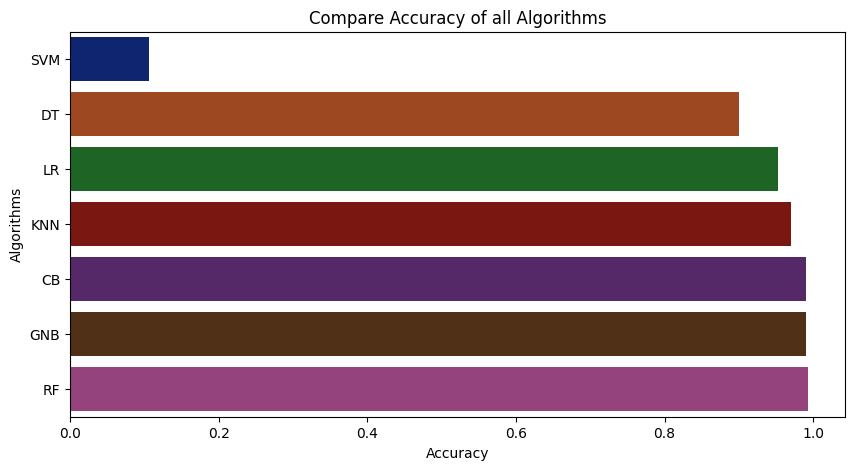

In [59]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Compare Accuracy of all Algorithms')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = AP,y = MN,palette='dark')

In [60]:
AOM = dict(zip(MN, AP))
for i, j in AOM.items():
    print (i,'==>',j)

SVM ==> 0.10681818181818181
DT ==> 0.9
LR ==> 0.9522727272727273
KNN ==> 0.9704545454545455
CB ==> 0.990909090909091
GNB ==> 0.990909090909091
RF ==> 0.9931818181818182


In [61]:
q = np.array([[ 22, 67, 78 , 17.1 , 14.42 , 6.2 , 72.3 ]])

In [62]:
PRED00 = RF.predict(q)
print(PRED00)

['chickpea']


C:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
w = np.array([[22,67,78,17.1,14.42,6.2,72.3]])

In [64]:
#PERD000 = RF.predict(w).

SyntaxError: invalid syntax (4110023508.py, line 1)

In [65]:
#print(PERD000)

NameError: name 'PERD000' is not defined